In [46]:
%cd '/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)'

/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)


In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
from PIL import Image
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [49]:
class traffic_sign(Dataset):  # pass the Dataset method in to this class
    def __init__(self, *args):

        # initialize dataset variables here
        print ('initialize')

    def __len__(self):
        # returns the length of the dataset
        return None

    def __getitem__(self, index):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        return image, label

In [64]:
obj = traffic_sign('/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)')

In [65]:
for dir in obj.root.iterdir():
  # print all of the folders and files in the root folder
  print(dir)  # dir is directory
  # print ?
  # print(list(dir.glob('*')))

/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/LECTURE_DATA_LOADERS.ipynb
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/TORCH_INTRODUCTION.ipynb
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/DS_Store
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/00013
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/00029
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/00014
/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)/00031
/content/drive/MyDrive/Mas

In [66]:
class traffic_sign(Dataset):  # pass the Dataset method in to this class
    def __init__(self, root_dir ):  # root_dir is root directory (where data is stored)

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)  # where the data resides

        self.df = pd.DataFrame(columns = ['image_names','class_label']) # define column headers of data frame

        for fldr in self.root.iterdir():  # self.root is root directory; iterdir() means loop through the folders and files in the root directory
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name # .name strips the file path and just shows the folder name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)  # .sample(frac=1) shuffles the data frame
        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df['class_label'].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx): # dont call getitem but program will run it

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        image_data = io.imread(image) # read the image
        # image_np = Image.fromarray(image_data)

        label = self.class_label[idx]

        sample = {'image': image_data, 'label': label}

        return sample # whenever getitem is called for a certain index it will return an image and a label

In [67]:
traffic_sign_dataset = traffic_sign('/content/drive/MyDrive/Masters/Semester 1/CVENG_8160_ADV_RES_METH_TRANS/module 03 (PyTorch fundamentals and linear regression)')

In [68]:
for idx, sample in enumerate(traffic_sign_dataset): # enumerate go through data row by row (data = sample; idx=index=rows); return two things
  print(sample) # this is returning the image and the label

  if idx == 5:
    break

{'image': array([[[ 71,  71,  86],
        [ 68,  68,  85],
        [ 66,  65,  82],
        ...,
        [228, 247, 253],
        [233, 248, 255],
        [233, 247, 255]],

       [[ 74,  76,  95],
        [ 67,  68,  89],
        [ 59,  60,  82],
        ...,
        [230, 249, 255],
        [236, 253, 255],
        [231, 247, 255]],

       [[ 72,  76,  90],
        [ 75,  78,  90],
        [ 61,  64,  78],
        ...,
        [232, 251, 255],
        [230, 249, 255],
        [230, 248, 255]],

       ...,

       [[106, 117, 143],
        [107, 119, 143],
        [108, 122, 147],
        ...,
        [ 18,  18,  25],
        [ 19,  19,  26],
        [ 19,  20,  27]],

       [[108, 118, 144],
        [105, 118, 144],
        [106, 123, 149],
        ...,
        [ 18,  18,  23],
        [ 19,  19,  25],
        [ 19,  20,  27]],

       [[109, 120, 146],
        [109, 122, 150],
        [109, 124, 152],
        ...,
        [ 19,  19,  23],
        [ 20,  20,  25],
        [ 18, 

0 (45, 40, 3) 00034
1 (31, 31, 3) 00040
2 (44, 46, 3) 00014
3 (123, 130, 3) 00013
4 (55, 55, 3) 00040
5 (38, 37, 3) 00014
6 (49, 47, 3) 00040
7 (36, 27, 3) 00029


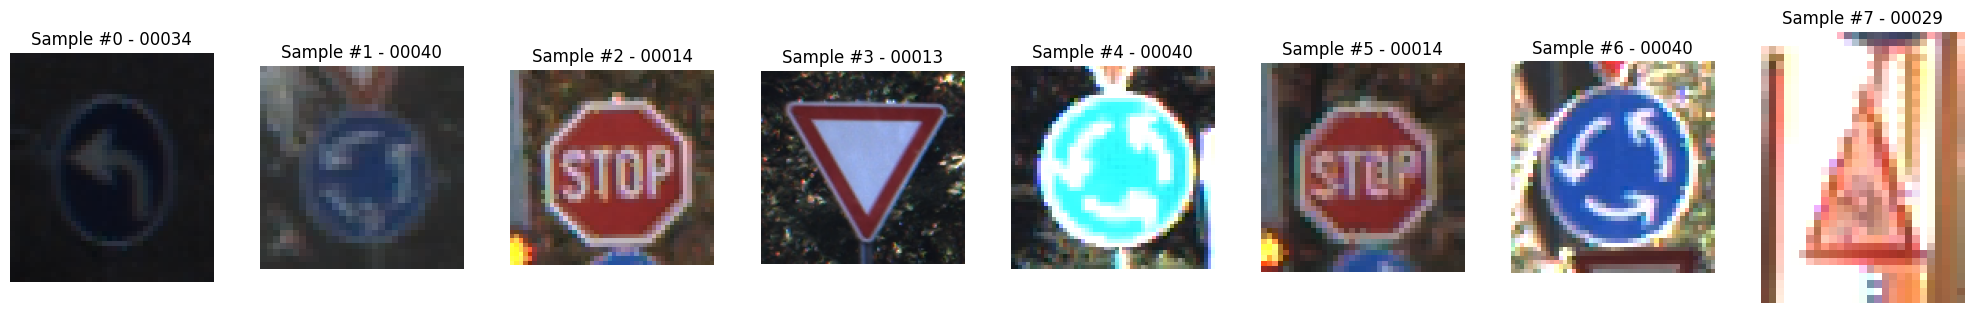

In [55]:
fig = plt.figure(figsize=(20,20)) # size of photo returned below
ncols = 8 # number of columns for photos returned below
for i, sample in enumerate(traffic_sign_dataset):
  print(i, sample['image'].shape, sample['label'])  # printing: current itteration/index, image shape (size), image name
  ax = plt.subplot(1, ncols, i + 1) # subplot: multiple plots in one plot. 1 row, 8 columns, where your current iteration will reside
  plt.tight_layout()  # make plots visible in window without scrolling sideways
  ax.set_title('Sample #{} - {}'.format(i, sample['label']))  # set title of subplots (images)
  ax.axis('off')  # turn off axis labels becuase they're images
# show_landmarks(**sample)
  plt.imshow(sample['image']) # creates an image from given data 'sample'

  if i == ncols-1:
      plt.show()
      break # stop loop when reach ncols

In [56]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))  # assert: check if certain condition met (is image an int or tuple?)
        self.output_size = output_size

    def __call__(self, sample): # automatically ran (don't need to call it)
        image, labels = sample['image'], sample['label']

        h, w = image.shape[:2]

        if isinstance(self.output_size, int): # rescale images based on user input
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w) # make sure image size is integers (not floats)

        img = transform.resize(image, (new_h, new_w)) # imported module that transform/resize image

        return {'image': img, 'label': labels}  # return data of image and image label/name

In [57]:
scale = Rescale(256)

In [58]:
out_img = scale(traffic_sign_dataset[500])  # pass the object 'traffic_sign_dataset' 500th image into Rescale

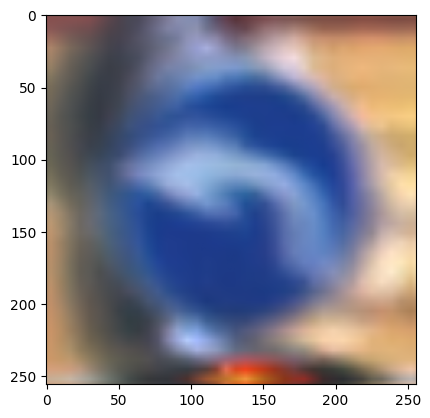

In [59]:
plt.imshow(out_img['image'])  # show newly resized image

In [ ]:
# import time
# composed = transforms.Compose([Rescale(256), Flip(0)])
# for i,trnsfm in enumerate([Flip(1), Rescale(128),composed]):
#   print (type(trnsfm).__name__)
#   # print (trnsfm(traffic_sign_dataset[500]))

#   ax = plt.subplot(1, 3, i + 1)
#   plt.imshow(trnsfm(traffic_sign_dataset[500])['image'])
#   plt.tight_layout()
#   ax.set_title(type(trnsfm).__name__)

In [90]:
## write a class to flip the image from left  to right or top to bottom
# sample was created earlier and is an image and a label for that image
class Flip(object):

  def __init__(self, type_of_flip):
    assert isinstance(type_of_flip, int)
    self.type_of_flip = type_of_flip

  def __call__(self, sample): # automatically ran (don't need to call it)
        image, labels = sample['image'], sample['label']

        new_img = np.flip(image, self.type_of_flip)
        return {'image': new_img, 'label': labels}

# write a class to transpose image to tensor
class ToTensor(object):

  # def __init__ (self, transpose): # i am not sure what to do with the init


  def __call__(self, sample):
     image, labels = sample['image'], sample['label']
     image_prepared = np.transpose(image, (2, 0, 1))
     image_tensor = torch.from_numpy(image_prepared)



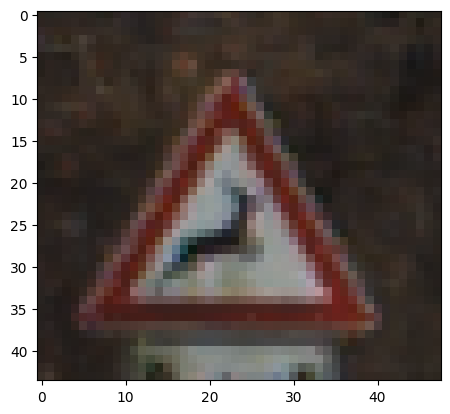

In [87]:
flip = Flip(1)
image = flip(traffic_sign_dataset[500])
plt.imshow(image['image'])